# Detecting Outliers

### Import Libraries

In [1]:
import pandas as pd
import matplotlib as mp
%matplotlib inline
import numpy as np

### Import Dataset and Check Format

In [10]:
cars = pd.read_csv("cars.csv", delimiter=";")

In [11]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,STRING,DOUBLE,INT,DOUBLE,DOUBLE,DOUBLE,DOUBLE,INT,CAT
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US


In [16]:
cars.drop(0, inplace=True)

In [17]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


### Check for Null Values and Other Discripancies 

In [22]:
cars["Car"].is_unique

False

In [20]:
cars["Car"].nunique()

308

In [23]:
len(cars)

406

In [29]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 1 to 406
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           406 non-null    object
 1   MPG           406 non-null    object
 2   Cylinders     406 non-null    object
 3   Displacement  406 non-null    object
 4   Horsepower    406 non-null    object
 5   Weight        406 non-null    object
 6   Acceleration  406 non-null    object
 7   Model         406 non-null    object
 8   Origin        406 non-null    object
dtypes: object(9)
memory usage: 31.7+ KB


In [38]:
dupli = cars["Car"].value_counts()

In [72]:
print(dupli)

Toyota Corolla                9
Ford Pinto                    6
Ford Maverick                 5
Volkswagen Rabbit             5
AMC Matador                   5
                             ..
AMC Hornet Sportabout (sw)    1
Datsun B-210                  1
Volvo 244DL                   1
Buick Skyhawk                 1
Pontiac Ventura SJ            1
Name: Car, Length: 308, dtype: int64


In [75]:
lst = []
for i in dupli.index:
    if dupli[i] > 1 and i not in lst:
        lst.append(i)
print(lst,"\n")
print(len(lst))

['Toyota Corolla', 'Ford Pinto', 'Ford Maverick', 'Volkswagen Rabbit', 'AMC Matador', 'Chevrolet Impala', 'AMC Hornet', 'Chevrolet Chevette', 'Peugeot 504', 'AMC Gremlin', 'Chevrolet Vega', 'Chevrolet Citation', 'Ford Gran Torino', 'Ford Galaxie 500', 'Chevrolet Caprice Classic', 'Chevrolet Nova', 'Plymouth Duster', 'Pontiac Catalina', 'Honda Civic', 'Volkswagen Dasher', 'Dodge Colt', 'Subaru', 'Dodge Aspen', 'Plymouth Fury iii', 'Opel 1900', 'AMC Matador (sw)', 'Chevrolet Chevelle Malibu Classic', 'Chevrolet Chevelle Concours (sw)', 'Ford Country Squire (sw)', 'Opel Manta', 'Pontiac Phoenix', 'Plymouth Valiant', 'Honda Civic CVCC', 'Toyota Mark II', 'Chevrolet Malibu', 'Chevrolet Chevelle Malibu', 'Ford LTD', 'Chevrolet Monte Carlo Landau', 'Oldsmobile Cutlass Salon Brougham', 'Ford Gran Torino (sw)', 'Buick Century', 'Buick Estate Wagon (sw)', 'Toyota Corolla Liftback', 'Mazda 626', 'Volkswagen Rabbit Custom', 'Honda Accord', 'Toyota Corolla 1200', 'Datsun 210', 'AMC Concord', 'Datsu

In [76]:
sum(dupli.head(57))

155

# Visualise

In [79]:
from matplotlib import pyplot as plt

In [80]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.,12.0,70,US
2,Buick Skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,US
3,Plymouth Satellite,18.0,8,318.0,150.0,3436.,11.0,70,US
4,AMC Rebel SST,16.0,8,304.0,150.0,3433.,12.0,70,US
5,Ford Torino,17.0,8,302.0,140.0,3449.,10.5,70,US


In [221]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(1, 11))
cars[['MPG','Cylinders',"Displacement","Horsepower","Weight","Acceleration","Model"]] = scaler.fit_transform(cars[['MPG','Cylinders',"Displacement","Horsepower","Weight","Acceleration","Model"]])


In [102]:
cars.head()     #scaled down to fit

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Chevrolet Chevelle Malibu,4.86266,11,7.17571,6.65217,6.3615,3.38095,1,US
2,Buick Skylark 320,4.21888,11,8.28682,8.17391,6.89736,3.08333,1,US
3,Plymouth Satellite,4.86266,11,7.45995,7.52174,6.1687,2.78571,1,US
4,AMC Rebel SST,4.43348,11,7.09819,7.52174,6.16019,3.38095,1,US
5,Ford Torino,4.64807,11,7.04651,7.08696,6.20556,2.4881,1,US


In [ ]:
# convert into array to use into KNN modeling

In [106]:
cyl = cars["Cylinders"].values.reshape(-1,1)
mpg = cars["MPG"].values.reshape(-1,1)
dis = cars["Displacement"].values.reshape(-1,1)
hp = cars["Horsepower"].values.reshape(-1,1)
wt = cars["Weight"].values.reshape(-1,1)
accl = cars["Acceleration"].values.reshape(-1,1)
mdl = cars["Model"].values.reshape(-1,1)

In [109]:
wagon = np.concatenate((cyl,hp),axis=1)

In [149]:
from pyod.models.knn import KNN
from pyod.models.abod import ABOD
from scipy import stats

### You can set the value of the outlier fraction according to your problem and your understanding of the data. In our example, I want to detect 5% observations that are not similar to the rest of the data. So, I’m going to set the value of outlier fraction as 0.05.

In [216]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.10


In [152]:
# Define outlier detection tool
classifiers = {'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),

}

In [128]:
xx , yy = np.meshgrid(np.linspace(1,11 , 200), np.linspace(1, 11, 200))

In [218]:
def visualizeoutlier(wagon):
    for i, (clf_name, clf) in enumerate(classifiers.items()):
        clf.fit(wagon)
        # predict raw anomaly score
        scores_pred = clf.decision_function(wagon) * -1

        # prediction of a datapoint category outlier or inlier
        y_pred = clf.predict(wagon)
        n_inliers = len(y_pred) - np.count_nonzero(y_pred)
        n_outliers = np.count_nonzero(y_pred == 1)
        plt.figure(figsize=(10, 10))

        # copy of dataframe
        dfx = cars
        dfx['outlier'] = y_pred.tolist()

        # IX1 - inlier feature 1,  IX2 - inlier feature 2
        IX1 =  np.array(dfx["Cylinders"][dfx['outlier'] == 0]).reshape(-1,1)
        IX2 =  np.array(dfx['Horsepower'][dfx['outlier'] == 0]).reshape(-1,1)

        # OX1 - outlier feature 1, OX2 - outlier feature 2
        OX1 =  dfx['Cylinders'][dfx['outlier'] == 1].values.reshape(-1,1)
        OX2 =  dfx['Horsepower'][dfx['outlier'] == 1].values.reshape(-1,1)

        print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)

        # threshold value to consider a datapoint inlier or outlier
        threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)

        # decision function calculates the raw anomaly score for every point
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
        Z = Z.reshape(xx.shape)

        # fill blue map colormap from minimum anomaly score to threshold value
        plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)

        # draw red contour line where anomaly score is equal to thresold
        a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='magenta')

        # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
        plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='blue')

        b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')

        c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')

        plt.axis('tight')  

        # loc=2 is used for the top left corner 
        plt.legend(
            [a.collections[0], b,c],
            ['learned decision function', 'inliers','outliers'],
            prop=mp.font_manager.FontProperties(size=20),
            loc=2)

        plt.xlim((1, 11))
        plt.ylim((1, 11))
        plt.title(clf_name)
        plt.show()

OUTLIERS :  11 INLIERS :  395 K Nearest Neighbors (KNN)


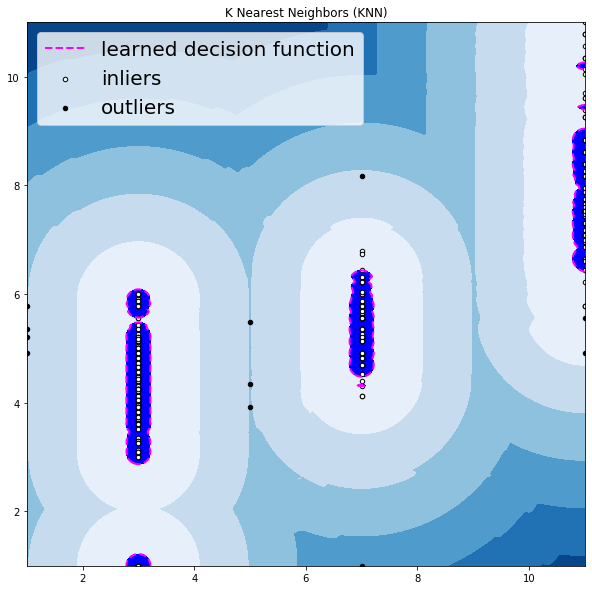

In [219]:
visualizeoutlier(wagon)

In [162]:
wagon2 = np.concatenate((cyl,accl),axis=1)

OUTLIERS :  18 INLIERS :  388 K Nearest Neighbors (KNN)


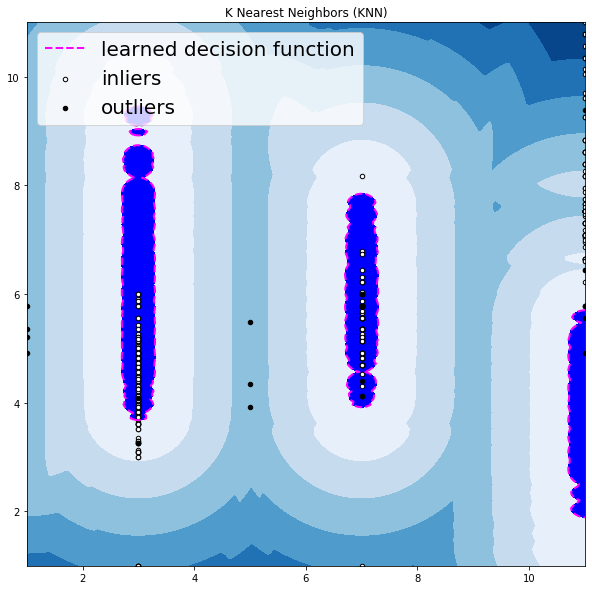

In [220]:
visualizeoutlier(wagon2)

## Boxplot for Outliers detection

In [160]:
wagoncombi = np.concatenate((mpg,cyl,hp,accl,wt,dis),axis = 1)


<function matplotlib.pyplot.show(*args, **kw)>

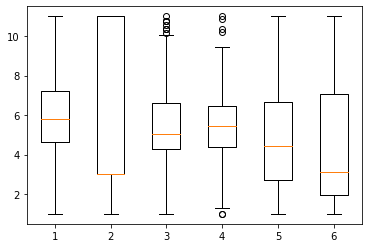

In [169]:
plt.boxplot(wagoncombi)
plt.show

## Z score For Outliers Detection

In [182]:
def outlier_zscore(Feature):
    std = np.std(Feature)
    mean = np.mean(Feature)
    threshold = 3

    #z score = (x-mean)/std
    #if z score is greather thn 3, we consider it as an outlier

    outliers = []
    for i in Feature:
        zscore = (i-mean)/std
        if zscore > threshold:
            outliers.append(i)
    print(len(outliers))
    print(outliers)



In [184]:
outlier_zscore(cars["Horsepower"])

4
[10.782608695652176, 10.782608695652176, 10.782608695652176, 11.0]


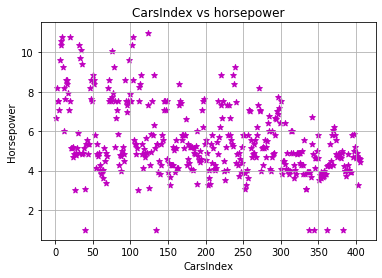

In [222]:
plt.scatter(cars.index,cars["Horsepower"],color="m",marker = "*")
plt.xlabel("CarsIndex")
plt.ylabel("Horsepower")
plt.title("CarsIndex vs horsepower")
plt.grid()
plt.show()

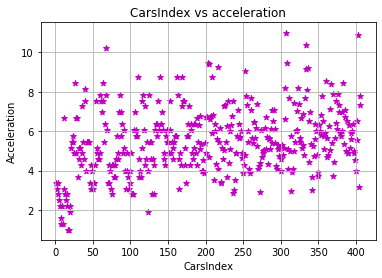

In [223]:
plt.scatter(cars.index,cars["Acceleration"],color="m",marker = "*")
plt.xlabel("CarsIndex")
plt.ylabel("Acceleration")
plt.title("CarsIndex vs acceleration")
plt.grid()
plt.show()

In [183]:
outlier_zscore(cars["Acceleration"])

2
[11.0, 10.880952380952385]


## IQR for Outliers Detection

### Based on
- lower band is min - iqr*1.5 
- upper band is max + iqr*1.5
- anything which lies out of lower-upper s an outlier

In [201]:
def outlier_iqr(feature):
    q1,q3 = np.percentile(feature,(25,75))
    iqr = q3-q1
    print("Inter Quartile Range: {}".format(iqr))
    minval = np.percentile(feature,25)
    print("Lower Quartile: {}".format(minval))
    maxval = np.percentile(feature,75)
    print("Higher Quartile: {}".format(maxval))
    
    upperbound = maxval + iqr*1.5
    lowerbound = minval - iqr*1.5
    outliers = []
    for i in feature:
        if i < lowerbound or i > upperbound:
            outliers.append(i)
    print(outliers)
    return len(outliers)

In [202]:
outlier_iqr(cars["Acceleration"])

Inter Quartile Range: 2.0684523809523805
Lower Quartile: 4.392857142857144
Higher Quartile: 6.461309523809525
[1.0, 1.0, 10.22619047619048, 11.0, 10.345238095238097, 10.880952380952385]


6

In [205]:
outlier_iqr(cars["Horsepower"])

Inter Quartile Range: 2.3478260869565215
Lower Quartile: 4.2608695652173925
Higher Quartile: 6.608695652173914
[10.56521739130435, 10.347826086956522, 10.782608695652176, 10.782608695652176, 10.347826086956522, 10.130434782608697, 10.347826086956522, 10.782608695652176, 11.0]


9

In [203]:
feature = [1,2,3,4,5,6,7,8,9,100,10,11,108]
#test

In [204]:
#test
outlier_iqr(feature)

Inter Quartile Range: 6.0
Lower Quartile: 4.0
Higher Quartile: 10.0
[100, 108]


2